In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from segysak.segy import get_segy_texthead, segy_header_scan, segy_loader
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import bruges as b
import xarray as xr
import segyio
from scipy.interpolate import griddata, splev, splrep


# Create a process that makes the user input a valid seg_y path
while True:
    try:
       # Inital Velocity input
        filename=(input("input path to volume ex:   C:user2\seismic_volume\.segy: "))
        scan = segy_header_scan(filename, max_traces_scan=0)
    except FileNotFoundError:
        print("Sorry, I didn't understand that.")
        #better try again... Return to the start of the loop
        continue
    else:
        #Cube Has been entered
        #we're ready to exit the loop.
        break

with pd.option_context('display.max_rows', 100):
    display(scan[scan['mean'] > 0])
#     display(scan)


while True:
    try:
       # Inline input
        input_iline=(int(input("input byte loc number for to iline, 9/10 time it is    189     : ")))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #better try again... Return to the start of the loop
        continue
    else:
        #inline Has been entered
        #we're ready to exit the loop.
        break

while True:
    try:
       # Xline input
        input_xline=(int(input("input byte loc number for xline, 9/10 time it is    193     : ")))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #better try again... Return to the start of the loop
        continue
    else:
        #xline Has been entered
        #we're ready to exit the loop.
        break

while True:
    try:
       # CDPx input
        input_cdpx=(int(input("input byte loc number for CDPx, 9/10 time it is    181     : ")))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #better try again... Return to the start of the loop
        continue
    else:
        #CDPx Has been entered
        #we're ready to exit the loop.
        break
        
while True:
    try:
       # CDPy input
        input_cdpy=(int(input("input byte loc number for CDPy, 9/10 time it is    185     : ")))
    except ValueError:
        print("Sorry, I didn't understand that.")
        #better try again... Return to the start of the loop
        continue
    else:
        #CDPy Has been entered
        #we're ready to exit the loop.
        break
scan = segy_header_scan(filename, max_traces_scan=0)
with pd.option_context('display.max_rows', 100):
    display(scan[scan['mean'] > 0])       
bytelocs = dict(iline=input_iline, xline=input_xline, cdpx=input_cdpx, cdpy=input_cdpy)
seismic = segy_loader(filename, **bytelocs)


Inline_info=str('Inlines: {:.0f}, RANGE:{:.0f}, min={:.0f}, max={:.0f}'.format(seismic.iline.size, seismic.iline.values.max()-seismic.iline.values.min(), seismic.iline.values.min(), seismic.iline.values.max()))
Xline_info=str('Crosslines: {:.0f},RANGE:{:.0f}, min={:.0f}, max={:.0f}'.format(seismic.xline.size,seismic.xline.values.max()-seismic.xline.values.min(), seismic.xline.values.min(), seismic.xline.values.max()))
Z_info=str('TWT: {:.0f}, RANGE:{:.0f} min={:.0f}, max={:.0f}'.format(seismic.twt.size,seismic.twt.values.max()-seismic.twt.values.min(), seismic.twt.values.min(), seismic.twt.values.max()))


print('Inlines: {:.0f}, min={:.0f}, max={:.0f}'.format(seismic.iline.size, seismic.iline.values.min(), seismic.iline.values.max()))
print('Crosslines: {:.0f}, min={:.0f}, max={:.0f}'.format(seismic.xline.size, seismic.xline.values.min(), seismic.xline.values.max()))
print('TWT: {:.0f}, min={:.0f}, max={:.0f}'.format(seismic.twt.size, seismic.twt.values.min(), seismic.twt.values.max()))
print('Total number of traces: {}'.format(seismic.iline.size*seismic.xline.size))




input path to volume ex:   C:user2\seismic_volume\.segy: D:\Volve\Stacks\ST0202R08_PZ_PSDM_RAW_STACK_PP_TIME.MIG_RAW.POST_STACK.3D.JS-017534.segy


,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,58479.0,1.520000e+02,87.468837,1.0,76.0,152.0,228.0,303.0
TRACE_SEQUENCE_FILE,5,58479.0,2.924000e+04,16881.577533,1.0,14620.5,29240.0,43859.5,58479.0
EnergySourcePoint,17,58479.0,2.234000e+03,174.937675,1932.0,2082.0,2234.0,2386.0,2536.0
CDP,21,58479.0,2.234000e+03,174.937675,1932.0,2082.0,2234.0,2386.0,2536.0
CDP_TRACE,25,58479.0,1.520000e+02,87.468837,1.0,76.0,152.0,228.0,303.0
TraceIdentificationCode,29,58479.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
NSummedTraces,31,58479.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
NStackedTraces,33,58479.0,7.321452e+01,20.922245,28.0,58.0,76.0,92.0,100.0
DataUse,35,58479.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
ElevationScalar,69,58479.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0


input byte loc number for to iline, 9/10 time it is    189     : 189
input byte loc number for xline, 9/10 time it is    193     : 193
input byte loc number for CDPx, 9/10 time it is    181     : 181
input byte loc number for CDPy, 9/10 time it is    185     : 185


,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,58479.0,1.520000e+02,87.468837,1.0,76.0,152.0,228.0,303.0
TRACE_SEQUENCE_FILE,5,58479.0,2.924000e+04,16881.577533,1.0,14620.5,29240.0,43859.5,58479.0
EnergySourcePoint,17,58479.0,2.234000e+03,174.937675,1932.0,2082.0,2234.0,2386.0,2536.0
CDP,21,58479.0,2.234000e+03,174.937675,1932.0,2082.0,2234.0,2386.0,2536.0
CDP_TRACE,25,58479.0,1.520000e+02,87.468837,1.0,76.0,152.0,228.0,303.0
TraceIdentificationCode,29,58479.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
NSummedTraces,31,58479.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
NStackedTraces,33,58479.0,7.321452e+01,20.922245,28.0,58.0,76.0,92.0,100.0
DataUse,35,58479.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
ElevationScalar,69,58479.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0



Loading as 3D
Fast direction is INLINE_3D



Inlines: 193, min=9985, max=10369
Crosslines: 303, min=1932, max=2536
TWT: 1126, min=0, max=4500
Total number of traces: 58479


In [49]:
StartX=seismic.xline.values.max()-seismic.xline.values.min()
StartY=seismic.twt.values.max()-seismic.twt.values.min()
seismic_high_low=np.percentile(seismic.data.values, 98)
Suggested_Color=-round(seismic_high_low.min(),4), round(seismic_high_low.max(),4)
from ipywidgets import Layout,HBox, Label

def seismic_plotter(section, seismic, colormap, il, xl, ts,min_c,max_c, range_x ,range_y, vert):
    """Plot a given seismic ILine, XLine or Timeslice with a choice of colormaps"""
    
    # display options for different sections
    sections = {
        'inline': {
            'amp': seismic.data.sel(iline=il),
            'opt': dict(x='xline', y='twt',  add_colorbar=True, interpolation='spline16',
                        robust=True, yincrease=False, cmap=colormap),
            'extents_x':[xl-(range_x/2), xl+(range_x/2)], 
            'extents_y':[ts+(range_y/2), ts-(range_y/2)],
            'line': il,
            'x_label': "XLine",
            'y_label': "TWT",
            'axhline_y': ts, 'axhline_c': 'b', 
            'axvline_x': xl, 'axvline_c': 'g',
            'axspine_c': 'r',
            'aspect': 'auto' },
        'xline': {
            'amp': seismic.data.sel(xline=xl),
            'opt': dict(x='iline', y='twt', add_colorbar=True, interpolation='spline16',
                        robust=True, yincrease=False, cmap=colormap),
            'extents_x':[il-(range_x/2), il+(range_x/2)], 
            'extents_y':[ts+(range_y/2), ts-(range_y/2)],
            'line': xl,
            'x_label': "InLine",
            'y_label': "TWT",
            'axhline_y': ts, 'axhline_c': 'b', 
            'axvline_x': il, 'axvline_c': 'r',
            'axspine_c': 'g',
            'aspect': 'auto'},
        'timeslice': {
            'amp': seismic.data.sel(twt=ts),
            'opt': dict(x='iline', y='xline', add_colorbar=True, interpolation='spline16',
                        robust=True, cmap=colormap ),
            'extents_x':[il-(range_x/2), il+(range_x/2)], 
            'extents_y':[xl+(range_y/2), xl-(range_y/2)],
            'line': ts,
            'x_label': "XLine",
            'y_label': "InLine",
            'axhline_y': xl, 'axhline_c': 'g', 
            'axvline_x': il, 'axvline_c': 'r',
            'axspine_c': 'b',
            'aspect': 'equal'  },        
    }
    


    # plot figure
    fig, ax = plt.subplots(figsize=(16, vert))
    

    # apply options
    ss = sections[section]
    
    plt.xlim(*ss["extents_x"]) 
    plt.ylim(*ss["extents_y"])
    ss['amp'].plot.imshow(ax=ax, **ss['opt'], vmin=min_c, vmax=max_c)
   
     # add projected lines
    ax.axhline(y=ss['axhline_y'], linewidth=1.5, color=ss['axhline_c'])
    ax.axvline(x=ss['axvline_x'], linewidth=1.5, color=ss['axvline_c'])
    ax.set_aspect(ss['aspect'])
    ax.set_xlabel(ss['x_label'], fontsize=20)
    ax.set_ylabel(ss['y_label'], fontsize=20)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)     
        ax.spines[axis].set_color(ss['axspine_c'])
    return

style = {'description_width': 'initial'}
ilmin, ilmax = seismic.iline.values.min(), seismic.iline.values.max()
ilmid = int((ilmax-ilmin)/2+ilmin)
ilstep = int(np.unique(np.diff(seismic.iline.values)))

xlmin, xlmax = seismic.xline.values.min(), seismic.xline.values.max()
xlmid = int((xlmax-xlmin)/2+xlmin)
xlstep = int(np.unique(np.diff(seismic.xline.values)))

tsmin, tsmax = seismic.twt.values.min(), seismic.twt.values.max()
tsmid = 2000
tsstep = int(np.unique(np.diff(seismic.twt.values)))

widg_sec = widgets.RadioButtons(options=['inline', 'xline', 'timeslice'],
                                value='inline', description='slicer', disabled=False)

widg_il_Play = widgets.Play(value=ilmid, min=ilmin, max=ilmax, step=ilstep, continuous_update=False,
                            description='<font color="red">inline</>', interval=500)
widg_il = widgets.IntSlider(value=ilmid, min=ilmin, max=ilmax, step=ilstep, continuous_update=False,
                            description='<font color="red">inline</>')
widgets.jslink((widg_il_Play, 'value'), (widg_il, 'value'))
il_box=widgets.HBox([widg_il_Play, widg_il])



widg_xl_Play = widgets.Play(value=xlmid, min=xlmin, max=xlmax, step=xlstep, continuous_update=False,
                            description='<font color="green">xline</>')
widg_xl = widgets.IntSlider(value=xlmid, min=xlmin, max=xlmax, step=xlstep, continuous_update=False,
                            description='<font color="green">xline</>')
widgets.jslink((widg_xl_Play, 'value'), (widg_xl, 'value'))
xl_box=widgets.HBox([widg_xl_Play, widg_xl])



widg_ts_Play = widgets.Play(value=tsmid, min=tsmin, max=tsmax,step=tsstep, continuous_update=False,
                       description='<font color="blue">timeslice</>')
widg_ts = widgets.IntSlider(value=tsmid, min=tsmin, max=tsmax,step=tsstep, continuous_update=False,
                       description='<font color="blue">timeslice</>')
widgets.jslink((widg_ts_Play, 'value'), (widg_ts, 'value'))
ts_box = widgets.HBox([widg_ts_Play, widg_ts])



widg_x_size=widgets.FloatText( description='X_Range:  ',value=StartX ,disabled=False,style=style)
widg_y_size=widgets.FloatText( description='Y_Range:  ',value=StartY,disabled=False,style=style)

widg_cmap = widgets.Dropdown(options=['Greys', 'Greys_r', 'seismic', 'seismic_r','PuOr','PuOr_r'],
                             value='Greys', description='Colormap:', disabled=False)
widg_min_color=widgets.FloatText(value=Suggested_Color[0],description='Min_Amp:',disabled=False)
widg_max_color = widgets.FloatText(value=Suggested_Color[1],description='Max_Amp:',disabled=False)

Bounds=widgets.VBox([widg_x_size,widg_y_size])

Description=widgets.VBox([Label('Use Values to Focus Window: Bounding Boxes'), Label(str(Inline_info)), Label(str(Xline_info)),Label(str(Z_info))])
widg_Vertical_Size=widgets.IntSlider(value=10,min=1, max=30, step=1,description='Vertical:',disabled=False,corientation='horizonatal')


color_adj=widgets.VBox([widg_cmap,widg_min_color,widg_max_color, Label('Suggested Starting Values'+str(Suggested_Color))])
box_sel = widgets.VBox([il_box, xl_box, ts_box])
                                          
ui = widgets.HBox([box_sel, color_adj])
ui2=widgets.HBox([widg_sec,widg_Vertical_Size])
ui3= widgets.HBox([Bounds,Description])

tool = widgets.interactive_output(seismic_plotter, {
    'section':widg_sec, 'seismic':fixed(seismic),
    'colormap': widg_cmap,
    'il': widg_il, 'xl': widg_xl, 'ts': widg_ts, 'min_c':widg_min_color, 'max_c':widg_max_color, 'range_x':widg_x_size,'range_y':widg_y_size, 'vert':widg_Vertical_Size })

display(ui,ui2,ui3, tool)


Output()

# Fluid Factor

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import bruges as b
import xarray as xr
import segyio
from scipy.interpolate import griddata, splev, splrep
# from seis_attribute import display_attribute
from seistool import openSegy3D, sliceCube, sliceFluidFactor, plot2D


near = openSegy3D("D:/Volve/Stacks/ST0202R08_PZ_PSDM_NEAR_OFFSET_PP_TIME_MIG_FIN_POST_STACK_3D_JS-017534.segy")
far = openSegy3D('D:/Volve/Stacks/ST0202R08_PZ_PSDM_FAR_OFFSET_PP_TIME_MIG_FIN.POST_STACK_3D_JS-017534.segy')

Successfully read 

Inline range from 9985 to 10369
Crossline range from 1932 to 2536
TWT from 0.0 to 4500.0
Sample rate: 4.0 ms
Survey rotation: 4.96 deg
Successfully read 

Inline range from 9985 to 10369
Crossline range from 1932 to 2536
TWT from 0.0 to 4500.0
Sample rate: 4.0 ms
Survey rotation: 4.96 deg


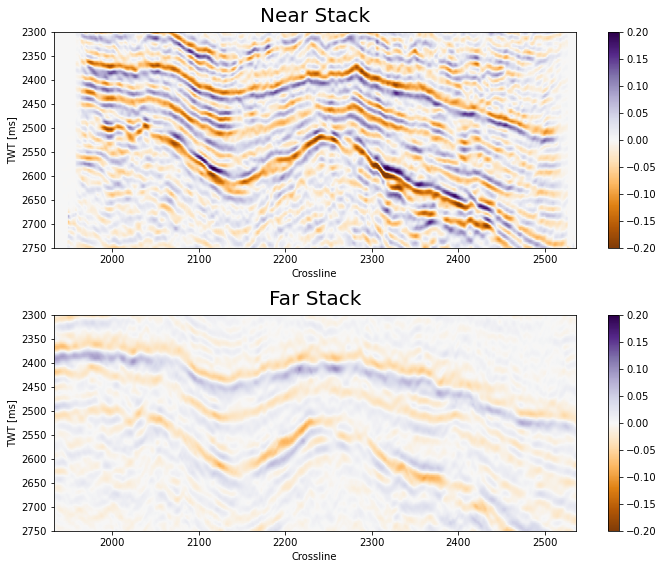

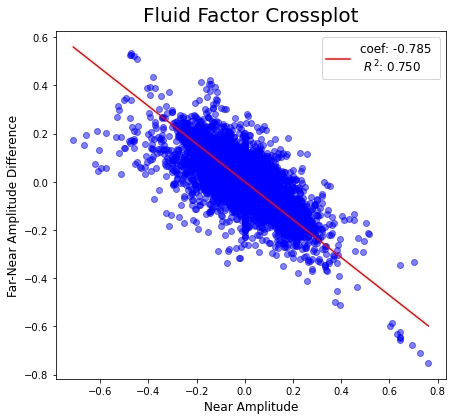

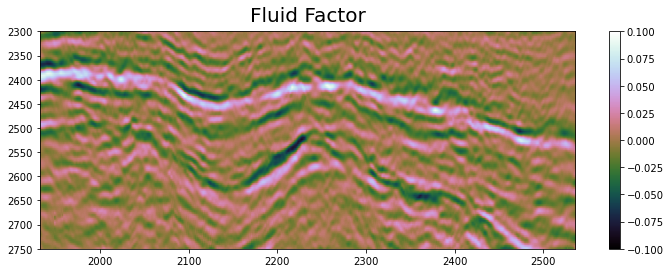

In [33]:
# Make slices inline 10191
near_sl = sliceCube(near, 'il', inline_loc=10191)
far_sl = sliceCube(far, 'il', inline_loc=10191)

# Plot stacks
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plot2D(near_sl.T, near, 'il', cmap='PuOr', vmin=-0.2, vmax=0.2)
plt.title("Near Stack", size=20, pad=10)
plt.xlabel("Crossline"); plt.ylabel("TWT [ms]")
plt.ylim(2750,2300)

plt.subplot(2,1,2)
plot2D(far_sl.T, near, 'il', cmap='PuOr', vmin=-0.2, vmax=0.2)
plt.title("Far Stack", size=20, pad=10)
plt.xlabel("Crossline"); plt.ylabel("TWT [ms]")
plt.ylim(2750,2300)



plt.tight_layout(1.05)
plt.show()

sliceFluidFactor(near, far, 'il', inline_loc=10191, crossplot=True)

FF = sliceFluidFactor(near, far, 'il', inline_loc=10191)

# Plot calculated fluid factor
plt.figure(figsize=(12,4))
plot2D(FF.T, near, 'il', cmap='cubehelix', vmin=-.1, vmax=.1)
plt.title('Fluid Factor', size=20, pad=10)
plt.ylim(2750,2300)
plt.show()